In [5]:
'''
@File    :   KNN.ipynb
@Time    :   2023/05/16 15:31:59
@Version :   1.0
@Author  :   Yacan Man
@Email   :   myxc@live.cn
@WebSite :   https://blog.manyacan.com
'''

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## KNN basics

### data preparation

In [6]:
raw_data_x = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [15]:
demo_point = np.array([8.093607318,3.365731514])

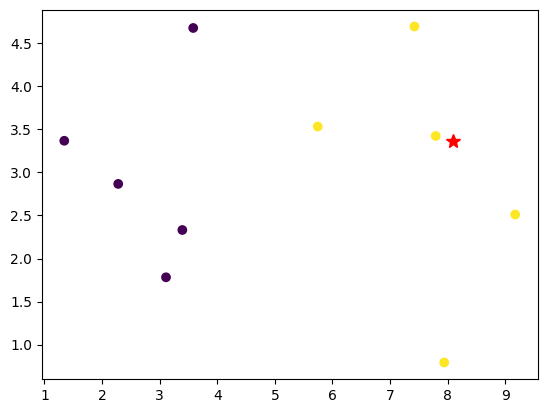

In [23]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(demo_point[0], demo_point[1], 'r*', markersize=10)

### KNN's implementation process

欧拉距离公式：

$$
D_{(x, y)}-\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+\cdots +(x_n-y_n)^2} =\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2 } 
$$

In [28]:
dis = []  # Storage test data point to the distance from each point in the figure

for x in x_train:  # Each point in the traversal map, calculate the distance from Euclidean Distance of the test point
    dis.append(np.sqrt(np.sum((x-demo_point)**2)))

print(dis)  # The distance result of printing calculation


[4.812566907609877, 5.229270827235305, 6.749798999160064, 4.6986266144110695, 5.83460014556857, 1.4900114024329525, 2.354574897431513, 1.3761132675144652, 0.3064319992975, 2.5786840957478887]


In [42]:
# It is simple to use the list generation formula
dis = [np.sqrt(np.sum((x-demo_point)**2)) for x in x_train]
dis

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [43]:
[dis.index(i) for i in list(sorted(dis))]

[8, 7, 5, 6, 9, 3, 0, 1, 4, 2]

In [46]:
sort_dis = np.argsort(dis)
sort_dis

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [51]:
K = 6
top_k_y = [y_train[i] for i in sort_dis[:K]]
top_k_y

[1, 1, 1, 1, 1, 0]

In [58]:
from collections import Counter
votes = Counter(top_k_y).most_common(1)[0]
print(f'The result of KNN is {votes[0]}, probability is {votes[1]}/{K}.')

The result of KNN is 1, probability is 5/6.
